# AutoEncoder_MNIST_HighCompression#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. In this example Max Pool Layers are being used in order to obtain a grater compression.
#### Network ####
Input(28,28,1) - Conv(3,3)  - Maxp (2,2) - Conv(3,3) - Maxp(2,2) - Out (12,12,5) - 2xTransposedConv(2,2) - Output (28,28,1)
#### Note ####
Converges to a nice solution almost always

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
import timeit
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [4]:
# dataset properties
print("Values per Image training:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
# dataset properties
print("Values per Image testing:", teX.shape[0])
print("Number of images for testing:", teX.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image training: 784
Number of images for training: 46900
Values per Image testing: 784
Number of images for testing: 23100


In [5]:
#subsample if necessary
trainSampleSize = 46900;
trXSub = trX[:,0:trainSampleSize]

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample6(28,28,1)


Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 28 Out Width: 28
Maxp In Depth: 16 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 14 Out Width: 14
Conv In Depth: 16 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 14 Out Width: 14
Maxp In Depth: 4 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 7 Out Width: 7
Tran In Depth: 4 In Height: 7 In Width: 7 Out Depth: 16 Out Height: 14 Out Width: 14
Tran In Depth: 16 In Height: 14 In Width: 14 Out Depth: 1 Out Height: 28 Out Width: 28


In [8]:
# train and test (prints some result and returns test results)
tic = timeit.default_timer();
deepAE.Train(trXSub,trXSub,0.0005,15)
toc = timeit.default_timer();
print(toc-tic)

Loss of a given sample at epoch: 0
8.60246
Loss of a given sample at epoch: 1
3.2406
Loss of a given sample at epoch: 2
3.77573
Loss of a given sample at epoch: 3
4.10671
Loss of a given sample at epoch: 4
8.48237
Loss of a given sample at epoch: 5
4.34078
Loss of a given sample at epoch: 6
5.55909
Loss of a given sample at epoch: 7
6.00436
Loss of a given sample at epoch: 8
3.16307
Loss of a given sample at epoch: 9
4.52212
Loss of a given sample at epoch: 10
2.38196
Loss of a given sample at epoch: 11
8.44585
Loss of a given sample at epoch: 12
3.68519
Loss of a given sample at epoch: 13
1.40493
Loss of a given sample at epoch: 14
3.47949
566.0606777650028


testing:


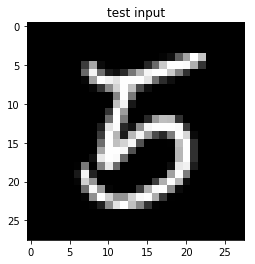

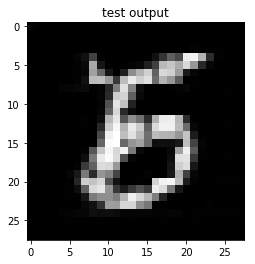

In [11]:
sampleNum = 4
deepAEOut = deepAE.Test(teX[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(teX[:,sampleNum],(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
deepAEOut

array([[1.56333265e-02],
       [4.85075409e-03],
       [2.66568855e-03],
       [1.39539676e-03],
       [2.29828985e-03],
       [2.61379282e-03],
       [3.86971523e-03],
       [5.84692764e-03],
       [2.87581219e-03],
       [2.62752373e-03],
       [3.39018344e-03],
       [4.08292983e-03],
       [2.65507742e-03],
       [1.93115234e-03],
       [1.98219217e-03],
       [1.72558669e-03],
       [2.47733724e-03],
       [2.32475574e-03],
       [2.94728179e-03],
       [3.51896318e-03],
       [2.18945468e-03],
       [2.52709454e-03],
       [3.75791620e-03],
       [5.75902725e-03],
       [1.80146373e-03],
       [1.94669474e-03],
       [2.74557853e-03],
       [4.10270451e-03],
       [5.96601095e-05],
       [1.19591849e-03],
       [6.15159365e-05],
       [3.33874759e-04],
       [1.14593298e-04],
       [3.40152180e-03],
       [9.08203161e-04],
       [3.33794445e-03],
       [1.28941856e-04],
       [2.92697269e-03],
       [6.15707518e-04],
       [2.25033346e-03],
